### ✅ Objective

We will implement a chatbot using LangGraph, named Super Bot, that:

✔️ Uses both OpenAI (paid) and Groq (open-source) models

✔️ Keeps track of conversation state

✔️ Uses a graph flow:

Start ➡️ Super Bot Node ➡️ End

✔️ Stores messages in a list using a state schema


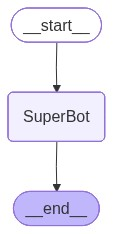

In [6]:
# 🔹 Step 2: Structure of Chatbot
# 📌 Chatbot flow:
# Start ➡️ Super Bot Node ➡️ End
# ✔️ Super Bot → Calls the LLM (OpenAI or Groq)
# ✔️ Uses a state to track messages

# 1️⃣ Import Required Libraries
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from typing import Annotated
from langgraph.graph.message import add_messages

# ✅ What this does:
# •	TypedDict: Used to define the shape of our input state.
# •	StateGraph: Main class to build our workflow (graph).
# •	START / END: Special markers to show where the graph starts and ends.
# •	Annotated + add_messages: Helps combine and manage messages in the graph.

# 2️⃣ Define the State Schema
class State(TypedDict):
    messages: Annotated[list, add_messages]
# ✅ What this means:
# •	We define that every input (state) must have a key called messages.
# •	messages is a list (of past or current messages).
# •	add_messages will help in automatically appending new messages to old ones.
# 📌 add_messages is a reducer → it appends messages into the chat history
# ✔️ Annotated: Helps LangGraph understand message format

# 3️⃣ Load API Keys for LLMs
import os
from dotenv import load_dotenv
load_dotenv()

os.environ["OPENAI_API_KEY"] = os.getenv("OPENAI_API_KEY")
os.environ["GROQ_API_KEY"] = os.getenv("GROQ_API_KEY")

# 4️⃣ Initialize LLMs
# from langchain_openai import ChatOpenAI
# llm = ChatOpenAI(model="gpt-4o")
# llm.invoke("Hello")

from langchain_groq import ChatGroq
llm_groq = ChatGroq(model="gemma2-9b-it")
llm_groq.invoke("Hey I am Apoorv and I like to play badminton")
# AIMessage(content="Hi Apoorv, it's nice to meet you! \n\nBadminton is a great sport. Do you play competitively or just for fun? \n\nWhat's your favorite thing about playing badminton? 😊\n\n", response_metadata={'token_usage': {'completion_tokens': 48, 'prompt_tokens': 21, 'total_tokens': 69, 'completion_time': 0.087272727, 'prompt_time': 0.00132588, 'queue_time': 0.250263509, 'total_time': 0.088598607}, 'model_name': 'gemma2-9b-it', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None}, id='run-03d3117f-ba20-4e97-93c3-dd71ff79e6ef-0', usage_metadata={'input_tokens': 21, 'output_tokens': 48, 'total_tokens': 69})


# 5️⃣ Define the Node Function: SuperBot 🤖
def superbot(state: State):
    return {"messages": [llm_groq.invoke(state['messages'])]}
# ✅ What this means:

# This is the function that the graph node will run.
# It:
# Takes the input state (which includes the user’s message).
# Sends the message to Groq’s model.
# Returns the response inside a messages list.
# ✅ This is our chatbot brain node.

# 6️⃣ Create the Graph
graph = StateGraph(State)
# ✅ What this means:
# We're creating a graph that works based on the State structure we defined.
# This graph will define the full workflow.

# 7️⃣ Add Node to the Graph
graph.add_node("SuperBot", superbot)
# ✅ What this means:
# We're adding one node to the graph.
# Node name is "SuperBot", and it runs the superbot() function.

# 8️⃣ Connect the Nodes (Add Edges)
graph.add_edge(START, "SuperBot")
graph.add_edge("SuperBot", END)

# ✅ What this means:
# Tells the graph:
# Start from START
# Then go to SuperBot
# Then go to END

# 9️⃣ Compile the Graph
graph_builder = graph.compile()
# ✅ What this means:
# This builds the graph so it's ready to be used.
# Think of this like “finishing the wiring of the flow.”

# 🔟 Display the Graph Visually
from IPython.display import Image, display
display(Image(graph_builder.get_graph().draw_mermaid_png()))
# ✅ What this means:
# Shows a visual diagram of your graph using Mermaid syntax.
# Helps you see your flow: Start → SuperBot → End.


In [ ]:
# # 1️⃣1️⃣ Run (Invoke) the Graph
graph_builder.invoke({'messages': "Hi, My name is Apoorv And I like to play badminton"})
# {'messages': [HumanMessage(content='Hi, My name is Apoorv And I like to play badminton', id='407f6edb-56a4-49f8-9b5e-417d13d5859a'),
#  AIMessage(content="Hi Apoorv, it's nice to meet you! \n\nBadminton is a great sport.  Do you play competitively or just for fun? 🏸  What's your favorite shot?  \n\n", response_metadata={'token_usage': {'completion_tokens': 47, 'prompt_tokens': 23, 'total_tokens': 70, 'completion_time': 0.085454545, 'prompt_time': 0.00133364, 'queue_time': 0.250920629, 'total_time': 0.086788185}, 'model_name': 'gemma2-9b-it', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None}, id='run-f1994a6c-3ace-45dd-a6b0-a7dd4e5839e2-0', usage_metadata={'input_tokens': 23, 'output_tokens': 47, 'total_tokens': 70})]}

# ✅ What this means:
# This starts the flow:
# Input: Message from the user.
# Goes to SuperBot → sends to LLM → gets a response.
# Ends the flow.
# Returns the chatbot’s reply.

# 1️⃣2️⃣ Stream the Responses (Optional)
for event in graph_builder.stream({"messages": "Hello My name is Apoorv and I like to play badminton"},stream_mode="values"):
    print(event)
# {'messages': [HumanMessage(content='Hello My name is Apoorv and I like to play badminton', id='aa9a83cf-4c01-4550-adf9-24c58e0a3746')]}
# {'messages': [HumanMessage(content='Hello My name is Apoorv and I like to play badminton', id='aa9a83cf-4c01-4550-adf9-24c58e0a3746'), AIMessage(content="Hello Apoorv,\n\nIt's nice to meet you! Badminton is a great sport.  \n\nDo you play competitively or just for fun? What's your favorite thing about badminton? 🏸 😊 \n", response_metadata={'token_usage': {'completion_tokens': 47, 'prompt_tokens': 22, 'total_tokens': 69, 'completion_time': 0.085454545, 'prompt_time': 0.00132383, 'queue_time': 0.253713829, 'total_time': 0.086778375}, 'model_name': 'gemma2-9b-it', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None}, id='run-42efc08c-00d8-44df-9c35-003babd216c9-0', usage_metadata={'input_tokens': 22, 'output_tokens': 47, 'total_tokens': 69})]}

# ✅ What this means:
# This shows each step as it's happening in real-time.
# You can see what happens at each node, useful for debugging.


{'messages': [HumanMessage(content='Hello My name is Apoorv and I like to play badminton', id='aa9a83cf-4c01-4550-adf9-24c58e0a3746')]}
{'messages': [HumanMessage(content='Hello My name is Apoorv and I like to play badminton', id='aa9a83cf-4c01-4550-adf9-24c58e0a3746'), AIMessage(content="Hello Apoorv,\n\nIt's nice to meet you! Badminton is a great sport.  \n\nDo you play competitively or just for fun? What's your favorite thing about badminton? 🏸 😊 \n", response_metadata={'token_usage': {'completion_tokens': 47, 'prompt_tokens': 22, 'total_tokens': 69, 'completion_time': 0.085454545, 'prompt_time': 0.00132383, 'queue_time': 0.253713829, 'total_time': 0.086778375}, 'model_name': 'gemma2-9b-it', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None}, id='run-42efc08c-00d8-44df-9c35-003babd216c9-0', usage_metadata={'input_tokens': 22, 'output_tokens': 47, 'total_tokens': 69})]}
